*ADS-A Week 6 Assignment*

# Who Survived the Titanic Disaster?

## 1. Introduction

In this titanic example we will use decision trees. The main advantage of this model is that humans can easily 
understand and reproduce the sequence of decisions taken to predict the target class of a new data point.

This is very important for tasks such as medical diagnosis or credit approval, where we want to show a reason for the 
decision, rather than just saying this is what the training data suggests (which is, by definition, what every supervised 
learning method does).

The problem we would like to solve is to determine if a Titanic's passenger would have survived, given age, passenger class, 
and sex. Why these features? 

Answer: Very specific features (name is an extreme case) could result in overfitting (consider a tree that just asks if the name is X, she survived). Features for which there are a small number of instances with each value present a similar problem. They might not be useful for generalization. We will use class, age, and sex because a priori, we expect them to have possibly influenced the passenger's survival.

Each instance in the dataset has the following form:

     "1","1st",1,"Allen, Miss Elisabeth Walton",29.0000,"Southampton","St Louis, MO","B-5","24160 L221","2","female"
     
Note that the raw data consists largely of strings. To apply machine learning algo's these strings have to be converted to numerical data first (at least the columns that are of interest)!

## 2. Prepare Dataset with Pandas 

Pandas is a Python module that works with the so-called dataframe concept (rows are observations, columns refer to the features). A dataframe is essentially a two-dimensional labeled data structure where
each column represent a feature and each row represents an observation.

More details, see: https://www.kaggle.com/c/titanic/details/getting-started-with-python-ii 

### 2.1. Load Dataset

Download the Titanic dataset (csv file) from Canvas, read it with Pandas into a dataframe. Show the first 5 rows.

In [2]:
import pandas as pd
import numpy as np

print('numpy version:', np.__version__)
print('matplotlib version:', pd.__version__)

## Your code ...

df_titanic = pd.read_csv("C:/Users/kofen/Documents/GitHub/DataScience/Exercises/Week 5/ADS-A ML w6 Titanic.csv")


numpy version: 1.14.3
matplotlib version: 0.23.0


In [3]:
df_titanic.head(5)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


Also show the 10 last rows. What is the problem in the last couple of rows?


In [4]:
## Your code ...
df_titanic.tail(10)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
1303,1304,3rd,0,"Yasbeck, Mr Antoni",NaN,NaN,NaN,NaN,NaN,NaN,male
1304,1305,3rd,1,"Yasbeck, Mrs Antoni",NaN,NaN,NaN,NaN,NaN,NaN,female
1305,1306,3rd,0,"Youssef, Mr Gerios",NaN,NaN,NaN,NaN,NaN,NaN,male
1306,1307,3rd,0,"Zabour, Miss Hileni",NaN,NaN,NaN,NaN,NaN,NaN,female
1307,1308,3rd,0,"Zabour, Miss Tamini",NaN,NaN,NaN,NaN,NaN,NaN,female
1308,1309,3rd,0,"Zakarian, Mr Artun",NaN,NaN,NaN,NaN,NaN,NaN,male
1309,1310,3rd,0,"Zakarian, Mr Maprieder",NaN,NaN,NaN,NaN,NaN,NaN,male
1310,1311,3rd,0,"Zenn, Mr Philip",NaN,NaN,NaN,NaN,NaN,NaN,male
1311,1312,3rd,0,"Zievens, Rene",NaN,NaN,NaN,NaN,NaN,NaN,female
1312,1313,3rd,0,"Zimmerman, Leo",NaN,NaN,NaN,NaN,NaN,NaN,male


### 2.2. Investigate Dataset

How does Pandas interpret the data? The following 3 commands can be used to investigate the data. Describe in your own words what the command does.

In [5]:
df_titanic.dtypes

## Your answer ...

##dtypes states the type of data for each column


row.names      int64
pclass        object
survived       int64
name          object
age          float64
embarked      object
home.dest     object
room          object
ticket        object
boat          object
sex           object
dtype: object

In [6]:
df_titanic.info()

## Your answer ...

##info prints information about the dataframe including column and index datatypes, but also if an object is null or not and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
row.names    1313 non-null int64
pclass       1313 non-null object
survived     1313 non-null int64
name         1313 non-null object
age          633 non-null float64
embarked     821 non-null object
home.dest    754 non-null object
room         77 non-null object
ticket       69 non-null object
boat         347 non-null object
sex          1313 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 112.9+ KB


In [7]:
df_titanic.describe()

## Your answer ...

## desribe generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.


,row.names,survived,age
count,1313.000000,1313.000000,633.000000
mean,657.000000,0.341965,31.194181
std,379.174762,0.474549,14.747525
min,1.000000,0.000000,0.166700
25%,329.000000,0.000000,21.000000
50%,657.000000,0.000000,30.000000
75%,985.000000,1.000000,41.000000
max,1313.000000,1.000000,71.000000


In [11]:
# Slice the first 10 rows of the 'age' column. 

## Your code ...

df_titanic.loc[:,['age']].head(10)


,age
0,29.0000
1,2.0000
2,30.0000
3,25.0000
4,0.9167
5,47.0000
6,63.0000
7,39.0000
8,58.0000
9,71.0000


In [12]:
# What kind of object is this 'age' column?   
type(df_titanic['age'])

#age is a series type

# Note: Single column is neither an numpy array, nor a pandas dataframe but rather a pandas-specific object called 
# data Series.

pandas.core.series.Series

In [ ]:
# The next thing we'd like to do is look at more specific subsets of the dataframe. Slice the columns 'sex', 'pclass', 
# and 'age'.

## Your code ...


In [13]:
# What is the average age over all passengers?

## Your code ...
df_titanic[['age']].mean(axis=0)


age    31.194181
dtype: float64

In [14]:
# First look at all of the missing 'age' values, because we will need to address them in our model if we hope to use 
# all the data for more advanced algorithms. To filter for missing values you can use:
df_titanic[df_titanic['age'].isnull()][['sex', 'pclass', 'age']]

# Here the only thing we did was print all (680) cases, but the same syntax can be used later if we take action on them.

,sex,pclass,age
12,female,1st,NaN
13,male,1st,NaN
14,male,1st,NaN
29,male,1st,NaN
32,male,1st,NaN
35,male,1st,NaN
40,male,1st,NaN
45,male,1st,NaN
46,male,1st,NaN
52,female,1st,NaN


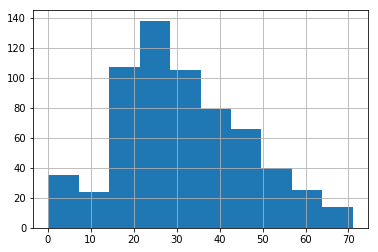

In [19]:
# Before we finish the initial investigation, let's use one other convenience function of pandas to derive a 
# histogram of any numerical column. 
import pylab as pyl
df_titanic['age'].hist()
pyl.show()

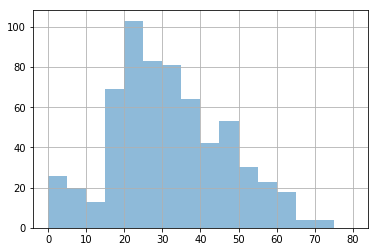

In [16]:
# Inside the parentheses of .hist(), you can also be more explicit about options of this function. Before you invoke 
# it, you can also be explicit that you are dropping the missing values of age:
df_titanic['age'].dropna().hist(bins=16, range=(0,80), alpha = .5)
pyl.show()

## 3. Data Munging

### 3.1. Transform the Data 

Transform the values in the dataframe into the shape we need for machine learning. 

First of all, it's hard to run analysis on the string values of "male" and "female". 
Let's store this transformation into a new column 'Gender'. We have a precedent of analyzing the women first, so let's decide female = 0 and male = 1.  

In [17]:
# Let's store our transformation in a new column, so the original sex isn't changed.
df_titanic['Gender'] = 4
df_titanic['Gender'] = df_titanic['sex'].map( {'female': 0, 'male': 1} ).astype(int)
df_titanic.head(3)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex,Gender
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0,Southampton,"St Louis, MO",B-5,24160 L221,2,female,0
1,2,1st,0,"Allison, Miss Helen Loraine",2.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male,1


In [18]:
df_titanic.pclass.unique()

array(['1st', '2nd', '3rd'], dtype=object)

In [22]:
# Do the same for passenger class, make it numeric, in a new column PClass. 
df_titanic['classnum'] = 4
df_titanic['classnum'] = df_titanic['pclass'].map({'1st' : 1, '2nd' : 2, '3rd' : 3}).astype(int)
df_titanic.head(10)
## Your code ...


,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex,Gender,classnum
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,0,1
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0,1
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male,1,1
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0,1
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,1,1
5,6,1st,1,"Anderson, Mr Harry",47.0000,Southampton,"New York, NY",E-12,NaN,3,male,1,1
6,7,1st,1,"Andrews, Miss Kornelia Theodosia",63.0000,Southampton,"Hudson, NY",D-7,13502 L77,10,female,0,1
7,8,1st,0,"Andrews, Mr Thomas, jr",39.0000,Southampton,"Belfast, NI",A-36,NaN,NaN,male,1,1
8,9,1st,1,"Appleton, Mrs Edward Dale (Charlotte Lamson)",58.0000,Southampton,"Bayside, Queens, NY",C-101,NaN,2,female,0,1
9,10,1st,0,"Artagaveytia, Mr Ramon",71.0000,Cherbourg,"Montevideo, Uruguay",NaN,NaN,(22),male,1,1


In [24]:
df_titanic = df_titanic[['row.names','pclass','classnum','survived','name','age','embarked','home.dest','room','ticket','boat','sex','Gender']]
df_titanic.head(5)

,row.names,pclass,classnum,survived,name,age,embarked,home.dest,room,ticket,boat,sex,Gender
0,1,1st,1,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,0
1,2,1st,1,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0
2,3,1st,1,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male,1
3,4,1st,1,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0
4,5,1st,1,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,1


In [31]:
# Show all males in the second class
df_titanic.loc[(df_titanic['Gender'] == 1) & (df_titanic['classnum'] == 2)]
## Your code ...


,row.names,pclass,classnum,survived,name,age,embarked,home.dest,room,ticket,boat,sex,Gender
322,323,2nd,2,0,"Abelson, Mr Samuel",30.0000,Cherbourg,"Russia New York, NY",NaN,NaN,NaN,male,1
324,325,2nd,2,0,"Andrew, Mr Edgar Samuel",18.0000,Southampton,"Buenos Aires, Argentina / New Jersey, NJ",NaN,NaN,NaN,male,1
325,326,2nd,2,0,"Andrew, Mr Frank",NaN,Southampton,"Cornwall, England Houghton, MI",NaN,NaN,NaN,male,1
326,327,2nd,2,0,"Angle, Mr William A.",34.0000,Southampton,"Warwick, England",NaN,NaN,NaN,male,1
328,329,2nd,2,0,"Ashby, Mr John",57.0000,Southampton,"West Hoboken, NJ",NaN,NaN,NaN,male,1
329,330,2nd,2,0,"Bailey, Mr Percy Andrew",18.0000,Southampton,"Penzance, Cornwall / Akron, OH",NaN,NaN,NaN,male,1
330,331,2nd,2,0,"Baimbrigge, Mr Charles R.",23.0000,Southampton,Guernsey,NaN,NaN,NaN,male,1
332,333,2nd,2,0,"Banfield, Mr Frederick J.",28.0000,Southampton,"Plymouth, Dorset / Houghton, MI",NaN,NaN,NaN,male,1
333,334,2nd,2,0,"Bateman, Rev Robert James",51.0000,Southampton,"Jacksonville, FL",NaN,NaN,(174),male,1
334,335,2nd,2,1,"Beane, Mr Edward",32.0000,Southampton,"Norwich / New York, NY",NaN,NaN,NaN,male,1


### 3.2. Deal with Missing Values

Now it's time to deal with the missing values of age! Why? Simply because most machine learning will need a complete set of 
values in that column to use it. By filling it in with guesses, we'll be introducing some noise into a model, but if we can 
keep our guesses reasonable, some of them should be close to the historical truth (whatever it was...), and the overall 
predictive power of age might still make a better model than before. 

We know the average age of all passengers (with valid age field) is 31.2 - we could fill in the null values with that mean value. But may be the median would be better? (to reduce the influence of a few rare 70- and 80-year olds?) The age histogram did seem positively skewed. These are the kind of decisions you make as you create your models.

In [35]:
# Replace the NaN (unknown) age values with a reasonable estimate. Do this in a new column 'AgeFill'

# Optionally, if you like a bit more programming try this one ...
# Use the mean age that was typical for males and females in each passenger class 

## Your code ...

df_titanic['AgeFill'] = df_titanic['age']
df_titanic.head()


,row.names,pclass,classnum,survived,name,age,embarked,home.dest,room,ticket,boat,sex,Gender,AgeFill
0,1,1st,1,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,0,29.0000
1,2,1st,1,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0,2.0000
2,3,1st,1,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male,1,30.0000
3,4,1st,1,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0,25.0000
4,5,1st,1,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,1,0.9167


In [36]:
df_titanic = df_titanic[['row.names','pclass','classnum','survived','name','age','AgeFill','embarked','home.dest','room','ticket','boat','sex','Gender']]
df_titanic.head(5)

,row.names,pclass,classnum,survived,name,age,AgeFill,embarked,home.dest,room,ticket,boat,sex,Gender
0,1,1st,1,1,"Allen, Miss Elisabeth Walton",29.0000,29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,0
1,2,1st,1,0,"Allison, Miss Helen Loraine",2.0000,2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0
2,3,1st,1,0,"Allison, Mr Hudson Joshua Creighton",30.0000,30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male,1
3,4,1st,1,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0
4,5,1st,1,1,"Allison, Master Hudson Trevor",0.9167,0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,1


In [60]:
slice1st= df_titanic.loc[df_titanic['classnum'] == 1]
slice2nd= df_titanic.loc[df_titanic['classnum'] == 2]
slice3rd= df_titanic.loc[df_titanic['classnum'] == 3]


print(slice1st[['AgeFill']].mean(axis=0))
print(slice2nd[['AgeFill']].mean(axis=0))
print(slice3rd[['AgeFill']].mean(axis=0))



df_titanic["AgeFill"].fillna(df_titanic.groupby("classnum")["AgeFill"].transform("mean"), inplace=True)

df_titanic.tail()




AgeFill    39.667773
dtype: float64
AgeFill    28.300314
dtype: float64
AgeFill    24.519658
dtype: float64


,row.names,pclass,classnum,survived,name,age,AgeFill,embarked,home.dest,room,ticket,boat,sex,Gender
1308,1309,3rd,3,0,"Zakarian, Mr Artun",24.519658,24.519658,NaN,NaN,NaN,NaN,NaN,male,1
1309,1310,3rd,3,0,"Zakarian, Mr Maprieder",24.519658,24.519658,NaN,NaN,NaN,NaN,NaN,male,1
1310,1311,3rd,3,0,"Zenn, Mr Philip",24.519658,24.519658,NaN,NaN,NaN,NaN,NaN,male,1
1311,1312,3rd,3,0,"Zievens, Rene",24.519658,24.519658,NaN,NaN,NaN,NaN,NaN,female,0
1312,1313,3rd,3,0,"Zimmerman, Leo",24.519658,24.519658,NaN,NaN,NaN,NaN,NaN,male,1


### 3.3 Hot Encoding

We have a categorical feature attribute: pclass. We already converted its three classes into 0, 1, and 2. This transformation implicitly introduces an ordering. 

As a final step, we will try a more general approach that does not assume an ordering. This is widely used to convert categorical classes into real-valued attributes. We will introduce an additional encoder and convert the class attributes into three new binary features, each of them indicating if the instance belongs to a feature value (1) or (0). This is called one hot encoding, and it is a very common way of managing categorical attributes for real-based methods.

In [61]:
df_titanic['FirstClass'] = df_titanic['pclass'].map( {'1st': 1, '2nd': 0, '3rd': 0} ).astype(int)
df_titanic['SecondClass'] = df_titanic['pclass'].map( {'1st': 0, '2nd': 1, '3rd': 0} ).astype(int)
df_titanic['ThirdClass'] = df_titanic['pclass'].map( {'1st': 0, '2nd': 0, '3rd': 1} ).astype(int)

df_titanic.head(5)

,row.names,pclass,classnum,survived,name,age,AgeFill,embarked,home.dest,room,ticket,boat,sex,Gender,FirstClass,SecondClass,ThirdClass
0,1,1st,1,1,"Allen, Miss Elisabeth Walton",29.0000,29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,0,1,0,0
1,2,1st,1,0,"Allison, Miss Helen Loraine",2.0000,2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0,1,0,0
2,3,1st,1,0,"Allison, Mr Hudson Joshua Creighton",30.0000,30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male,1,1,0,0
3,4,1st,1,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0,1,0,0
4,5,1st,1,1,"Allison, Master Hudson Trevor",0.9167,0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,1,1,0,0


## 4. Finalize Dataset for Analysis

In [63]:
# Finalize pre-processing by turning this into a numerical feature set (dataframe titanic_X) and a numerical target column 
# (dataframe titanic_y)
titanic_X = df_titanic[['AgeFill','Gender','FirstClass','SecondClass','ThirdClass']]
titanic_y = df_titanic['survived']

In [64]:
titanic_X.head(10)

,AgeFill,Gender,FirstClass,SecondClass,ThirdClass
0,29.0000,0,1,0,0
1,2.0000,0,1,0,0
2,30.0000,1,1,0,0
3,25.0000,0,1,0,0
4,0.9167,1,1,0,0
5,47.0000,1,1,0,0
6,63.0000,0,1,0,0
7,39.0000,1,1,0,0
8,58.0000,0,1,0,0
9,71.0000,1,1,0,0


In [65]:
titanic_y.head(10)

0    1
1    0
2    0
3    0
4    1
5    1
6    1
7    0
8    1
9    0
Name: survived, dtype: int64

## 5. Analyse Dataset

The preprocessing step is usually under-estimated in machine learning methods, but as we can see even in this very simple example, it can take some time to make data look as our methods expect. It is also very important in the overall machine learning process; if we fail in this step (for example, incorrectly encoding attributes, or selecting the wrong features), the following steps will fail, no matter how good the method we use for learning!!

We are now ready for the implementation of decision trees in scikit-learn, as this algo expects as input a list of 
real-valued features, and the decision rules of the model would be of the form: Feature < value. 
For example, AgeFill < 20.0.

Standardization (normalization) is not an issue for decision trees because the relative magnitude of features does not 
affect the classifier performance; so scaling is not needed.

### 5.1. Training a Decision Tree Classifier

In [72]:
# Now to the interesting part; let's build a decision tree from our training data. 
# As usual, first separate training and testing data, and check the size of both sets.
from sklearn.model_selection import train_test_split

## Your code ...

X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(titanic_X, titanic_y, test_size=0.25)


In [99]:
# Now, we can create a new DecisionTreeClassifier and use the fit method of the classifier to do the learning job. 
# Parameter settings: use the entropy citerion and try out different settings for the depth of the tree and the 
# minimum samples required for a node in the tree graph
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(criterion='entropy')
## Your code ...
clf.fit(X_titanic_train, y_titanic_train)



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 5.2. Evaluation Metrics Function

In [98]:
# Define a generic helper function to measure the performance of the classifier, and call this function to show 
# the results (e.g. accuracy)
from sklearn import metrics
from sklearn.metrics import accuracy_score


## Your code ...
def accuracytest(classifier,X_test,y_test):
    return accuracy_score(clf.predict(X_test), y_test)

accuracytest(clf,X_titanic_test,y_titanic_test)




0.8358662613981763

## 6. Introducing Random Forest

A common criticism to decision trees is that once the training set is divided after
answering a question, it is not possible to *reconsider this decision*. For example, if
we divide men and women, every subsequent question would be only about men or
women, and the method could not consider another type of question (say, age less
than a year, irrespective of the gender). Random Forests try to introduce some level
of randomization in each step, proposing alternative trees and combining them to
get the final prediction. These types of algorithms that consider several classifiers
answering the same question are called **ensemble methods**. In the Titanic task, it is
probably hard to see this problem because we have very few features, but usually
a case has in the order of thousand(s) features.

Random Forests propose to build several decision trees, each one based on a subset of the training
instances (selected randomly), and using a small random number of features. 
This produces multiple classifiers (multiple decision trees). 
At prediction time, each grown tree, given an instance, predicts its target class exactly as decision trees do. 
The class that most of the trees vote (that is the class most predicted by the trees) is the one suggested by the ensemble classifier.

## 7. Implement Random Forest

Implement a Random Forest classifier. Can you improve to above accuracy? Look at the sklearn documentation. Play with the parameters of the ``RandomForestClassifier``. Especially the parameter ``n_estimators`` (the number of trees in the forest) is of interest.

In [ ]:
# Implement a Random Forest classifier, does this improve the prediction?



## Your code ...
